In [8]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
import datetime
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from proj1_helpers import *
DATA_TRAIN_PATH = '/Users/AntoineDaeniker/Documents/EPFL/Master 1/ML_course/projects/project1/data/train.csv' # TODO: download train data and supply path here 
y, tX, tXt, ids = load_csv_data(DATA_TRAIN_PATH)
print(y.shape, tX.shape)

(250000,) (250000, 30)


In [13]:
new_data = data_process(tX)

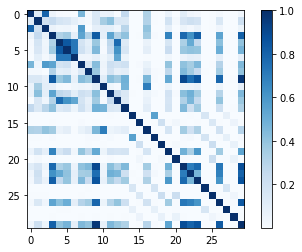

In [23]:
corr_mat = np.corrcoef(new_data, rowvar=False)
plt.imshow(np.abs(corr_mat), cmap='Blues')
plt.colorbar()
plt.show()

In [27]:
print(np.argwhere((corr_mat - np.eye(30)) > 0.6))

[[ 0  2]
 [ 2  0]
 [ 3  9]
 [ 3 19]
 [ 3 21]
 [ 3 22]
 [ 3 23]
 [ 3 29]
 [ 4  5]
 [ 4 12]
 [ 5  4]
 [ 5 12]
 [ 9  3]
 [ 9 21]
 [ 9 22]
 [ 9 23]
 [ 9 26]
 [ 9 29]
 [10 16]
 [12  4]
 [12  5]
 [16 10]
 [19  3]
 [21  3]
 [21  9]
 [21 22]
 [21 23]
 [21 26]
 [21 29]
 [22  3]
 [22  9]
 [22 21]
 [22 26]
 [22 29]
 [23  3]
 [23  9]
 [23 21]
 [23 26]
 [23 29]
 [26  9]
 [26 21]
 [26 22]
 [26 23]
 [26 29]
 [29  3]
 [29  9]
 [29 21]
 [29 22]
 [29 23]
 [29 26]]
